# Summary

The Gateway Viability Scenario group is a series of simulations designed to help inform the specification of protocol parameters assumed to impact the gateway role in the ecosystem. The scenarios cover a variety of different demand environments for network services by varying both the number of applications and the number of relay requests. Different combinations of protocol parameter values generate different simulation outcomes, that are summarized by key peformance indicators (KPIs). The KPIs are then assessed according to desired values (success criteria), using _threshold inequalities_ generated from threshold values for KPIs that meet stakeholder criteria.

Because an exhaustive 'sweep' of every possible combination of relevant protocol parameters is computationally infeasible, this study has instead performed an **adaptive search**, whereby a coarse initial grid of parameters is successively refined by applying the success criteria to generated KPIs, and inferring a new 'direction' of search for a succeeding grid. Convergence is achieved when all success criteria are met across the performed simulations. Although it is always possible that multiple "equilibria" exist, such that success criteria are met by parameter combinations that are not found from adaptive search, the initial grid is informed by existing parameter values from the Pocket network and hence benefit from the expert knowledge used to define those initial values. 

Future work can perform a more thorough search of the underlying parameter space, in addition to performing more demand scenarios and realizations from the exogenous distributions that represent external factors.

# Contents

**Experimental Setup**: This covers the objective of the study and its methodology, describes the KPIs and success indicators (threshold inequalities), the protocol and environmental sweep parameters and their initial ranges, and finally summarizes the computational complexity of the simulations themselves.

**Adaptive Grid Results**: The evolution of the parameter selection process is presented as a visualization, showing the convergence of the protocol parameter ranges as different success criteria are achieved.

**Protocol Parameter Recommendations**: Based upon the adaptive grid results, the recommended parameter ranges are presented.

**Decision Tree and Parameter Importance**: Using the adaptive grid results, a machine-learning process is applied to infer the importance of different parameters on the associated KPI-based threshold inequalities. This provides a method of assessing whether one or more parameters are 'crucial' to success, in the sense that they have an outsized impact on the success criteria. This approach leverages decision trees that are fit to the results of the entire adaptive grid process.

**Parameter Impact on KPIs**: A density approach (histogram) can be used to assess the impact of protocol parameters on the KPIs of the scenario. The KPI densities are shown for each protocol parameter sweep value, providing a visual indication of the impact of the parameter on the density shape and location.

**Conclusion**: An overall assessment of the scenario results is provided, highlighting any problems, caveats, implications and possibilities for future/extended work.

# Experimental Setup

## Objective and Methodology

The objective of the gateway viability scenario group is to understand the economic incentives to become and to remain a gateway, while ensuring that the ecosystem as a whole remains viable.

- **System Goals Targeted**:
  - Economic Viability
  - Accessibility
- **Design**: create different demand-side circumstances (e.g. application growth, relay per application growth) that impact gateway profitability
- **Testing Variables**:
  - Environmental:
      - Introduce different application arrival rates, by changing the maximum number of applications that can exist in the simulation. This is a proxy for different demand scenarios for the network's services based upon the entities that require services. Alternatively, it may be thought of as introducing different capacity constraints of the network to handle application traffic.
      - Introduce different relay traffic rates per session, by changing the expected value of relay traffic. This is a proxy for different demand scenarios for the network's services per application--a low value means applications participating in the network are 'light' in relay requests, while a high value implies that applications are requesting many relays per session and are thus 'heavy' in resource demand.
  - Protocol:
      - Assess the impact of different `TokenToRelaysMultiplier` (TTRM) values. The TTRM is the rate limiter used to convert a gateway's stake into bandwidth for handling relay traffic. A high TTRM relaxes this rate limiter, while a small TTRM restricts bandwidth and (in this simulation) reduces gateway profitability as relays served falls.
      - Assess the impact of different `GatewayFeePerRelay` (GFPR) values. This is a direct cost assessed to gateways from serving relays.
      - Assess the impact of different `ApplicationFeePerRelay` (AFPR) values. A higher 'wedge' between GFPR and AFPR incentivizes (on the margine) one type of participant over the other.
      - Assess the impact of different `GatewayMinimumStake` (GMS) values. This is a running cost that must be fulfilled in order to participate as a gateway, and has an associated opportunity cost (value of using staked funds for an alternative use, proxied here by its investment in a risk-free instrument paying a 5% annual rate of return).
      - Assess the impact of different `ApplicationMinimumStake` (AMS) values. To prevent barriers to entry it is generally accepted that AMS < GMS, as applications are expected to operate on a smaller scale. But AMS values impact gateway profitability as well, having an impact on general relay traffic and rate-limiting via the TTRM.

## KPIs

- Servicer NPV (KPI-1): This measures whether or not servicers are profitable.
- Gateway NPV (KPI-3): The main KPI for this scenario group. This measures whether or not gateways are profitable.
- Servicer Capital Costs per Unit of Reward (KPI-14): This is an ancillary KPI to KPI-1 and KPI-3, and measures the trade-off that exists between the opportunity cost of being a servicer and the expected reward. Intuitively, the ecosystem should not 1) make it more attractive for servicers to exit the ecosystem (even if profitable), or 2) reduce security by rewarding participation to the extent that the stake does not become a deterrent to undesirable behavior.

## Threshold Inequalities

1. (**Servicer Capital Costs**) The average servicer cost per unit of reward must lie between $0.1$ and $0.9$. This inequality restriction is referenced in the code as `servicer_capital_costs_success`.
2. (**Servicer NPV**) The fraction of the Monte Carlo simulations for which Servicer NPV is greater than $750$ POKT must be at least $90$%. This inequality restriction is referenced in the code as `servicer_npv_success`.
3. (**Gateway NPV**) The fraction of the Monte Carlo simulations for which Gateway NPV is greater than $7500$ POKT must be at least $90$%. This inequality is referenced in the code as `gateway_npv_success`.

## Sweep Parameters

### Swept Protocol Parameters

1. `TokenToRelaysMultiplier` (`TTRM`)
2. `GatewayFeePerRelay` (`GFPR`)
3. `ApplicationFeePerRelay` (`AFPR`)
4. `GatewayMinimumStake` (`GMS`)
5. `ApplicationMinimumStake` (`AMS`)

### Swept Environmental Parameters

1. Maximum number of applications in the simulation, `application_max_number`. Sweeping this parameter changes the arrival rate of applications by adjusting the time before the network is 'saturated'.
2. Average arrival rate of the relay request process, `relays_per_session_gamma_distribution_scale`. Coupled with the parameter `relays_per_session_gamma_distribution_shape`, this sets the expected value of the number of relays in a session, which is modeled using a [Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution) having these scale and shape parameter values.

## Initial Parameter Sweep Ranges

Protocol and Environmental parameters were initialized for the first adaptive grid search according to:
1. Values found in the specifications provided to BlockScience ([V1 Mechanism spreadsheet](https://docs.google.com/spreadsheets/d/1Gpnw3ZXNh9lWFgmrbrg8wTqVKPD2M8QqJdAiAALru38/edit?usp=sharing), [V1 Minting spreadsheet](https://docs.google.com/spreadsheets/d/1QYe6NzuiyimsXs5cT1BSM-UT1DtX_K38cOZsEFJOtdA/edit?usp=sharing)),
2. Discussions with the Pocket team, and
3. BlockScience best practice. 

### Environmental Parameters

| Full Name |  Sweep Variable Name | Sweep Values | Units |
| --- | --- | ---| ---|
| Maximum Number of Applications  | `application_max_number` |(5, 20, 100) | number |
| Relays Per Session Gamma Distribution Scale  | `relays_per_session_gamma_distribution_scale` | (1e5, 3e5, 9e5) | relays/day |

### Protocol Parameters

| Full Name |  Sweep Variable Name | Sweep Values | Units |
| --- | --- | ---| ---|
| `TokenToRelaysMultiplier`  | `session_token_bucket_token_coefficient` | (25, 400) | relay/uPOKT |
| `GatewayFeePerRelay`       | `gateway_fee_per_relay` | (10, 100) | uPOKT/relay |
| `ApplicationFeePerRelay`   | `application_fee_per_relay` | (10, 100) | uPOKT/relay |
| `GatewayMinimumStake`      | `gateway_minimum_stake`  | (1e5, 2e5) | POKT |
| `ApplicationMinimumStake`  | `minimum_application_stake`  | (1e4, 2e4)  | POKT |

## Computational Complexity

**Total number of parameter constellations**: $2^{5} \times 3^2 = 288$

**Total number of Monte Carlo runs per constellation**: 5

**Total number of experiments per adaptive grid**: 1,440

**Number of adaptive grid searches**: 6

**Total number of parameter constellations evaluated**: 8,640

# Adaptive Grid Results

In [1]:
import os
os.chdir("..")
from psuu import load_all_kpi_comparison_data, load_scenario_kpi_comparison_data, threshold_comparison_plot, decision_tree_feature_importance_plot

KPIs are referenced as:
servicer_npv_success: 1
servicer_capital_costs_success: 2
gateway_npv_success: 3


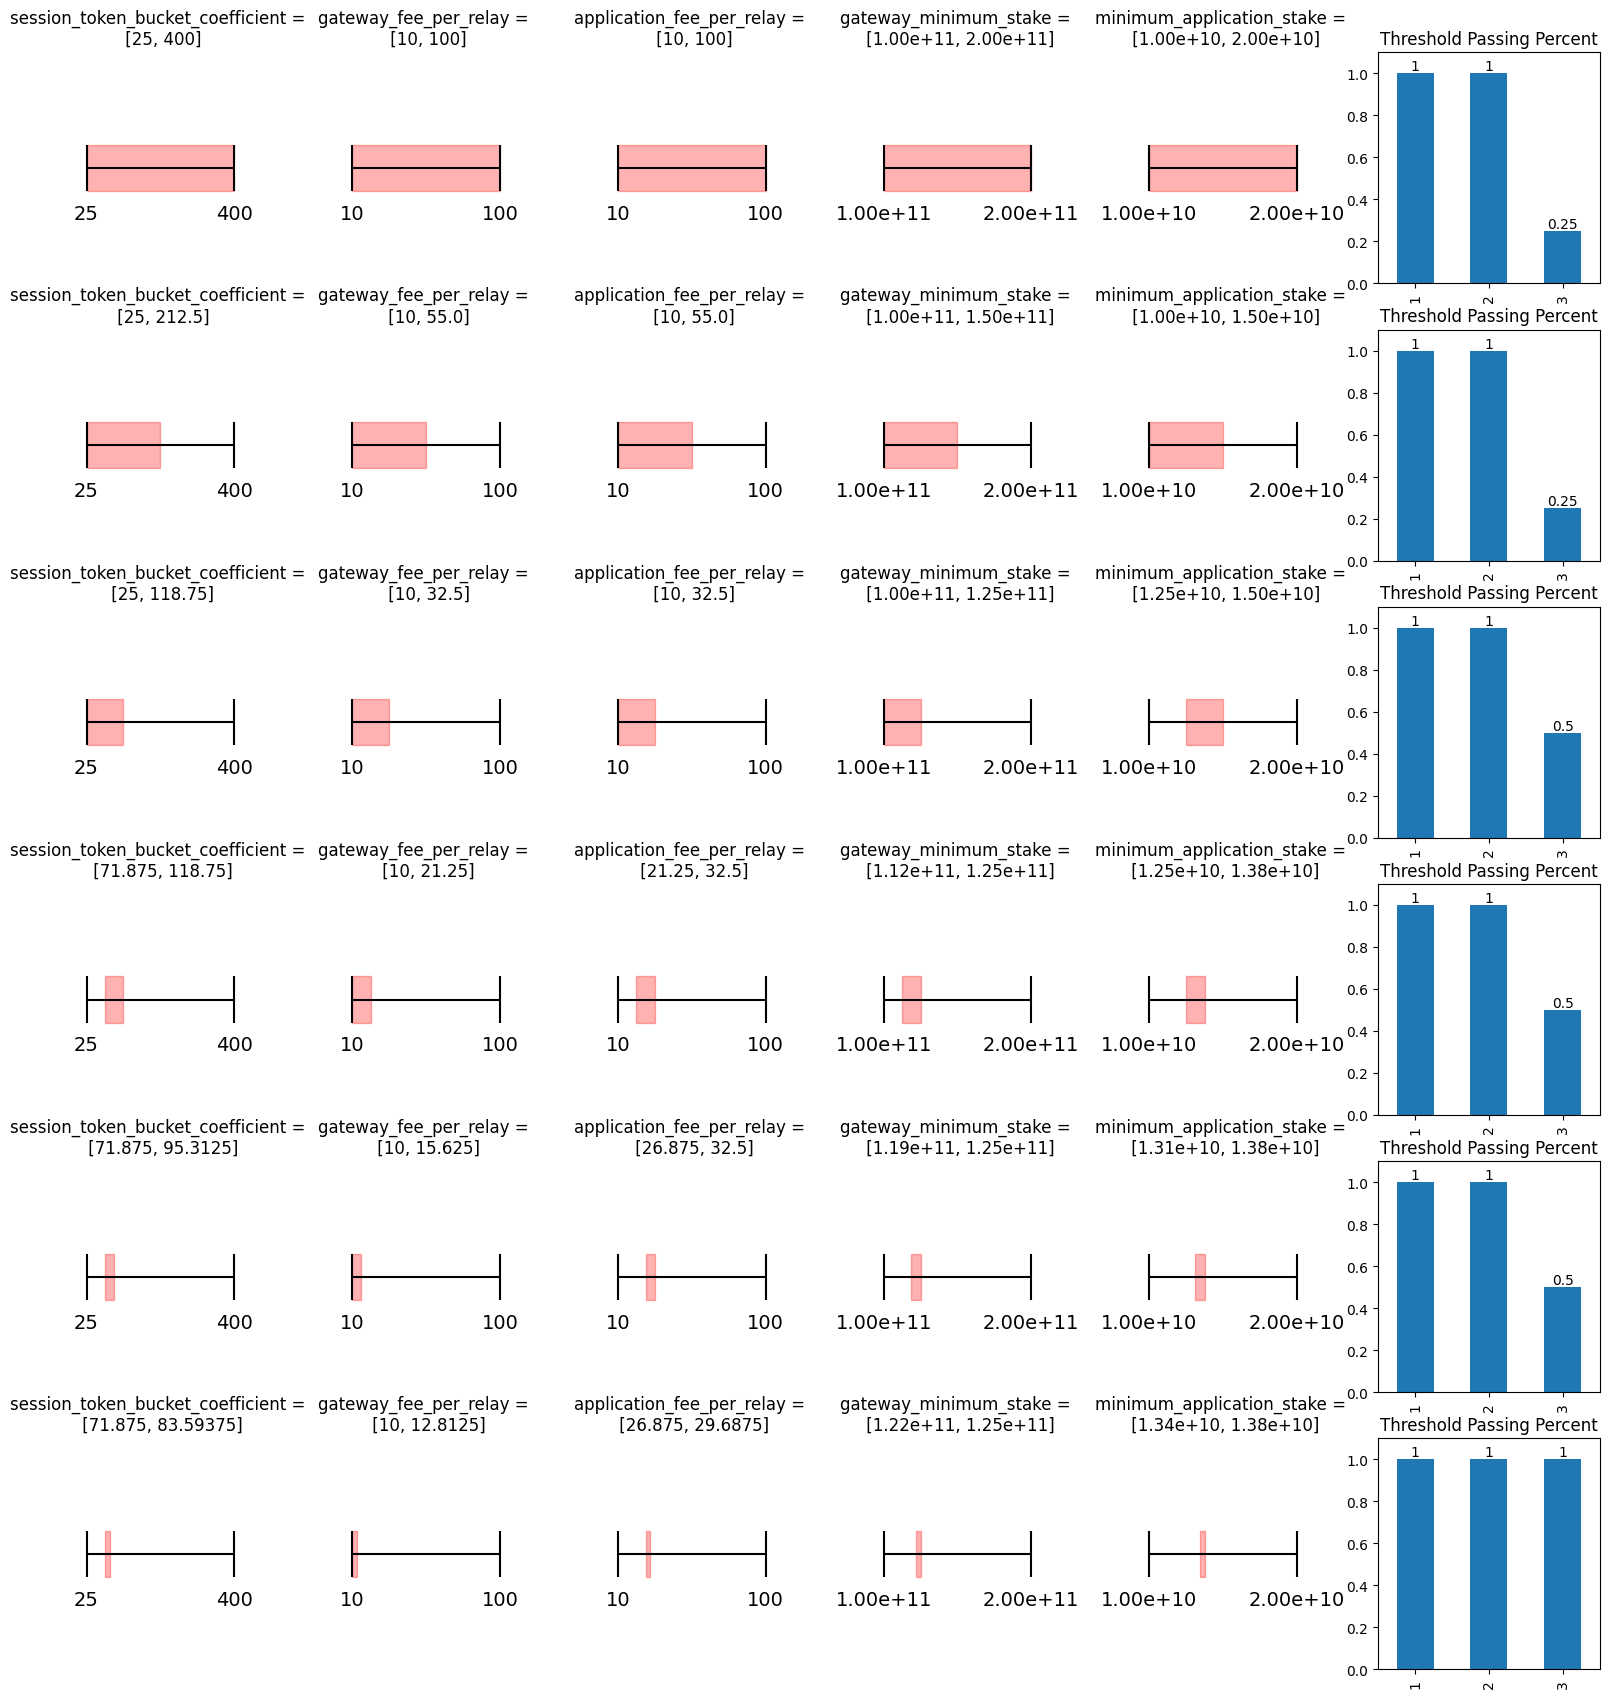

In [2]:
scenario_sweep_category = 'gateway_viability_sweep_ag'
kpis = load_scenario_kpi_comparison_data(scenario_sweep_category)
threshold_comparison_plot(kpis[scenario_sweep_category])

# Protocol Parameter Recommendations

From the adaptive grid results, the recommended parameter ranges for the swept protocol parameters are:

| Full Name |  Abbreviation | Recommended Range | Units |
| --- | --- | ---| ---|
| `TokenToRelaysMultiplier`| `session_token_bucket_token_coefficient` | (71.875, 83.59735) | relay/uPOKT |
| `GatewayFeePerRelay` | `gateway_fee_per_relay` |  (10, 12.8125) | uPOKT/relay |
| `ApplicationFeePerRelay` | `application_fee_per_relay` | (26.875, 29.6875) | uPOKT/relay |
| `GatewayMinimumStake`  | `gateway_minimum_stake`  | (1.22e5, 1.25e5) | POKT |
| `ApplicationMinimumStake`  | `minimum_application_stake` | (1.35e4, 1.38e4)  | POKT |

# Decision Tree and Parameter Importance

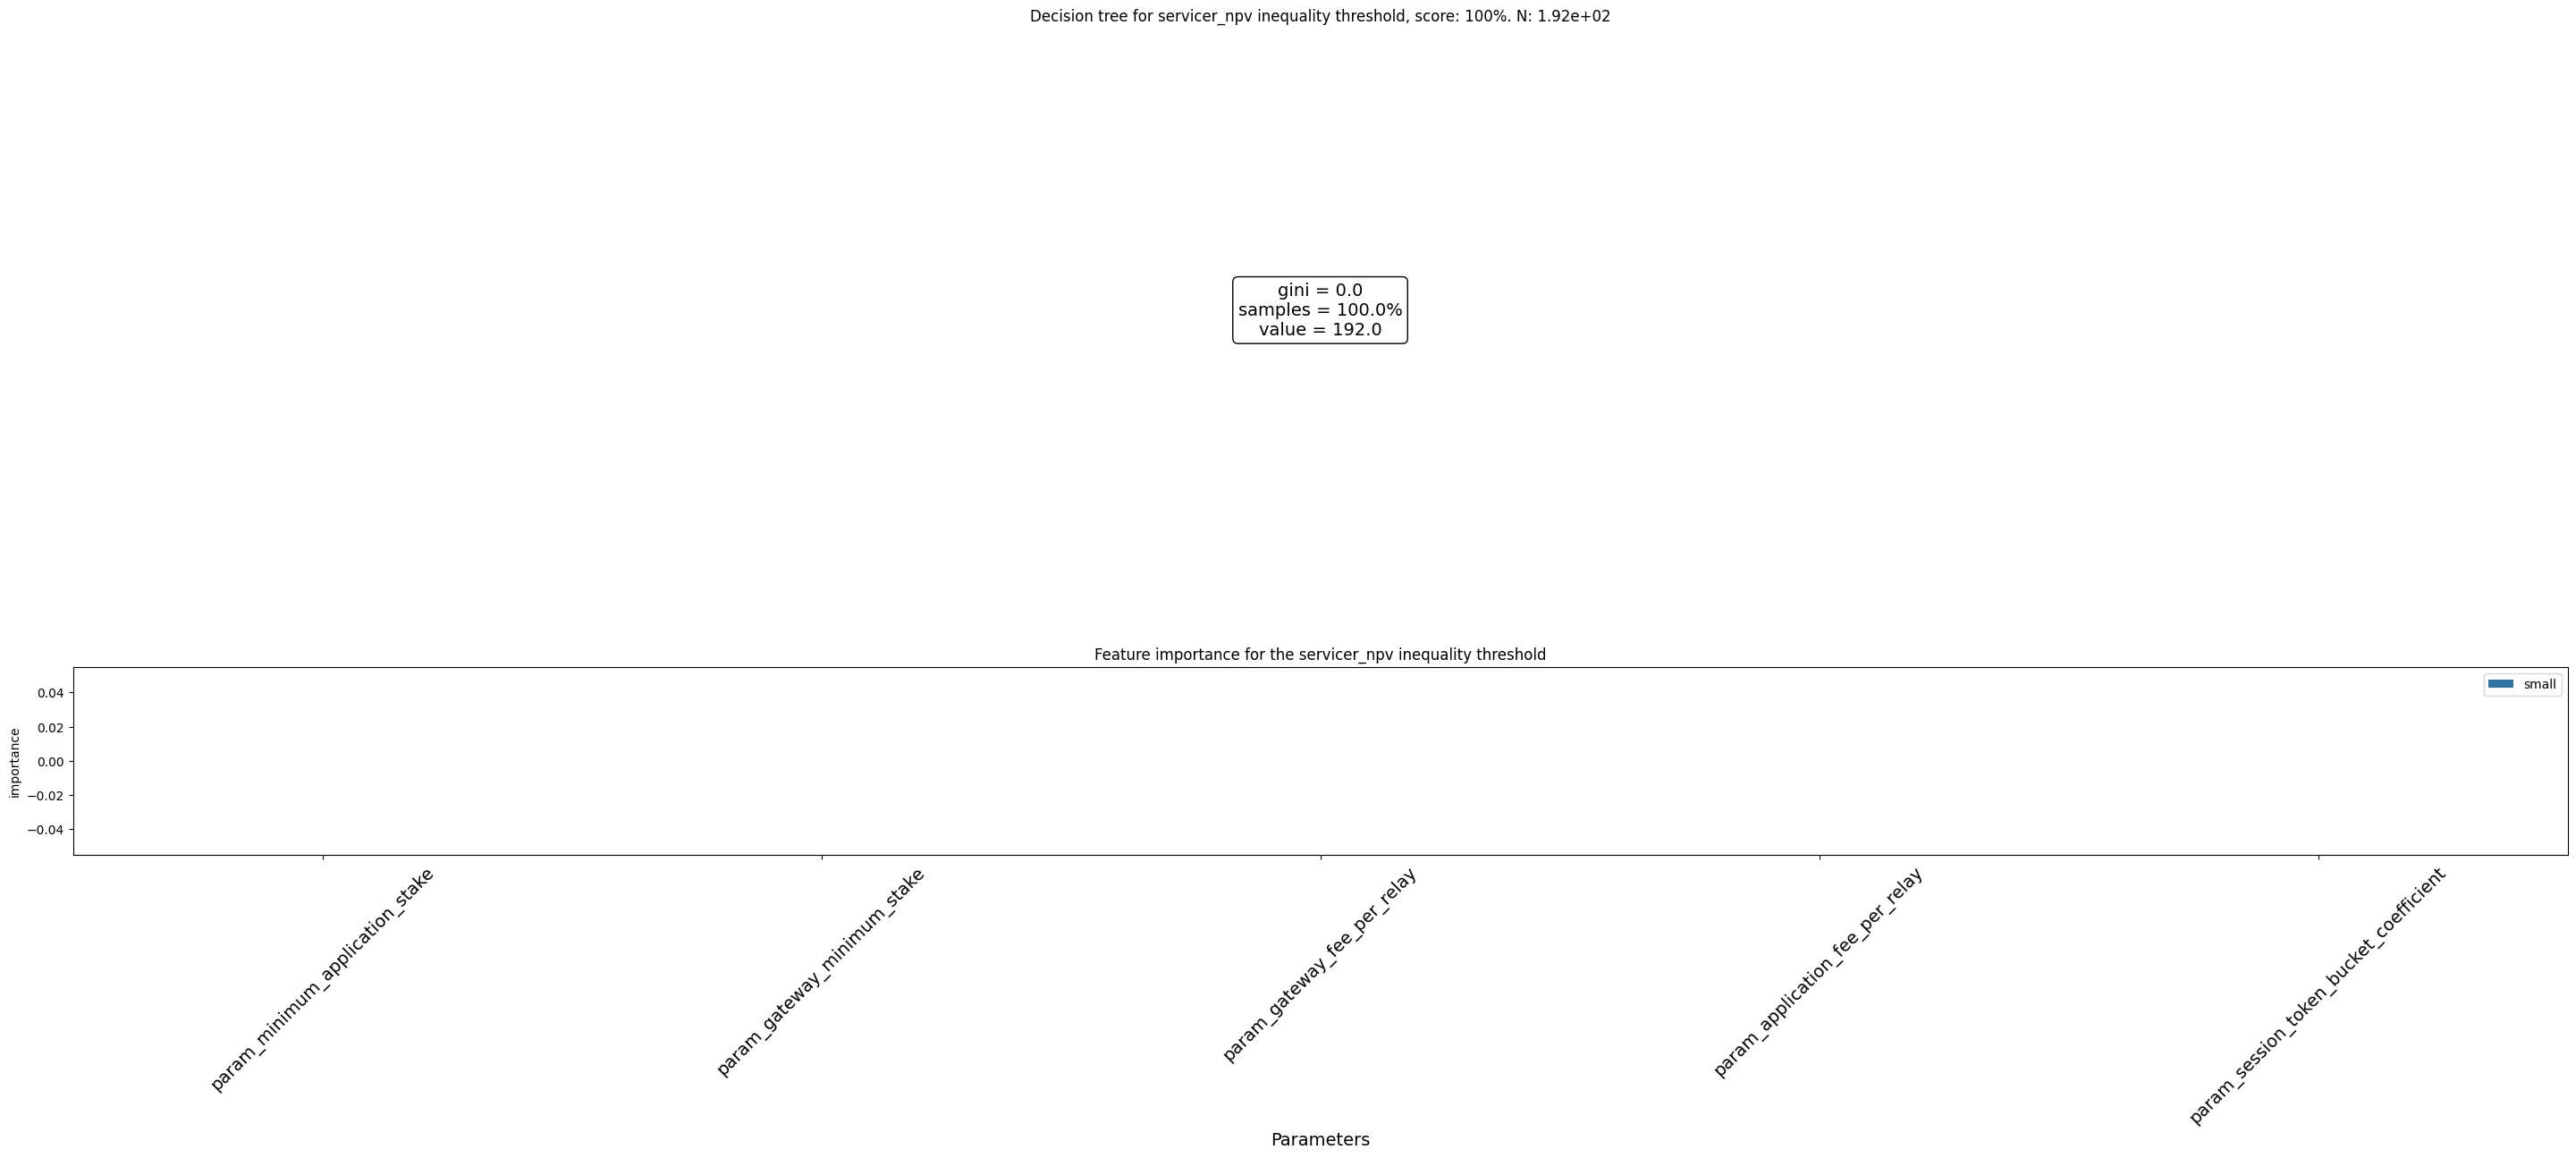

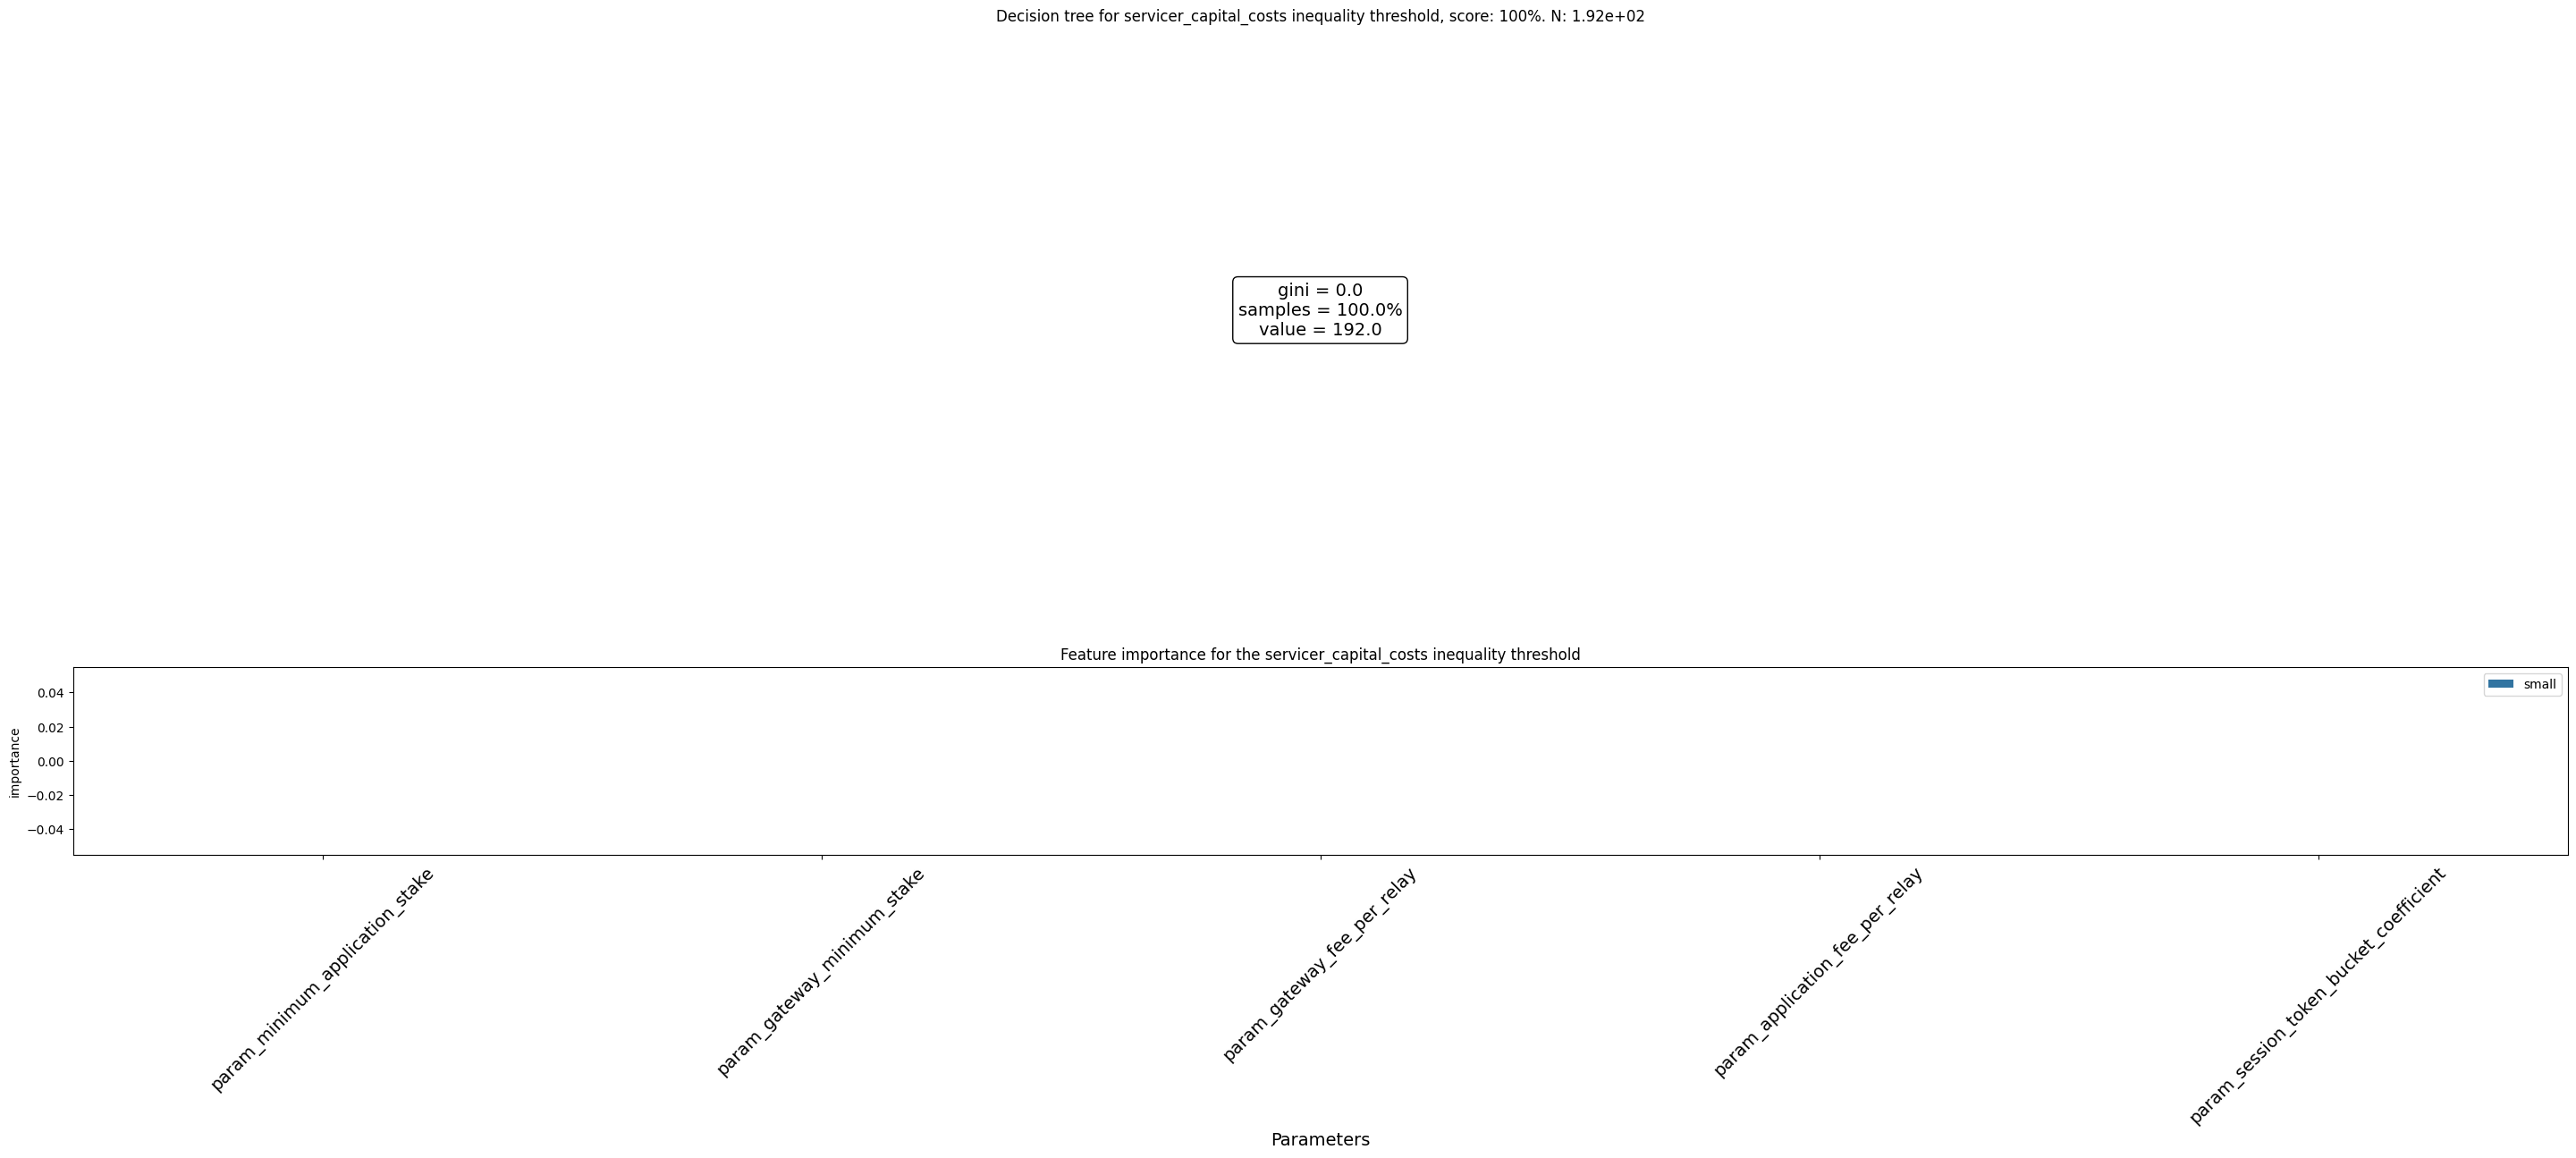

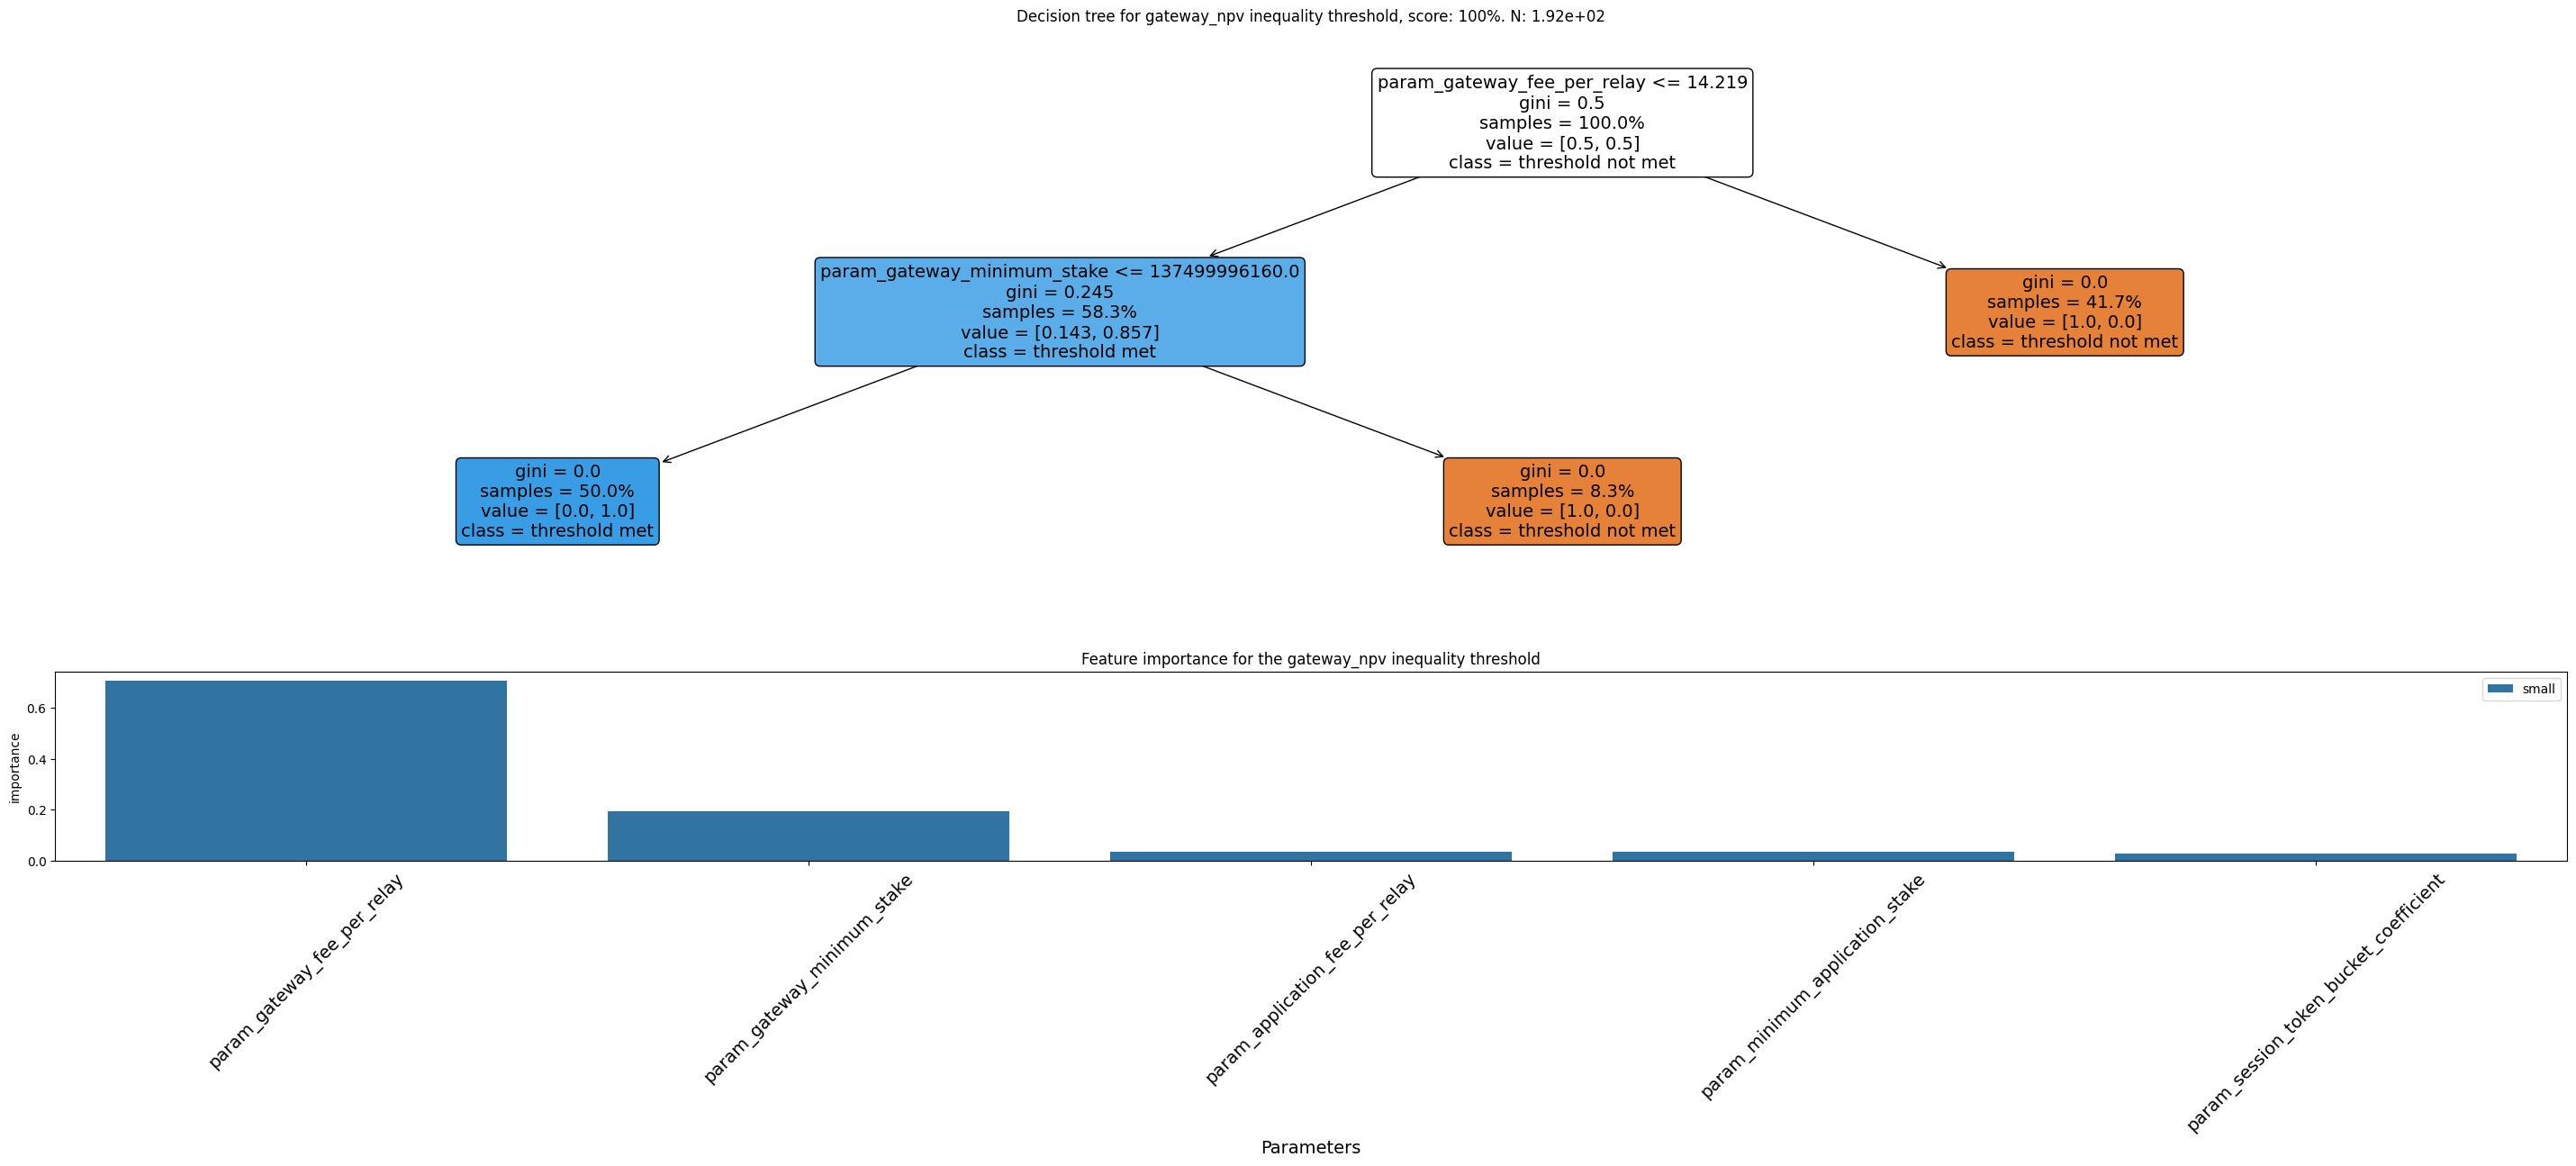

In [3]:
decision_tree_feature_importance_plot(scenario_sweep_category)

# Parameter Impact on KPIs

# Conclusion

As is evident from the adaptive grid search results and the decision tree analysis, the success criteria for servicer profitability and servicer capital costs were met for every parameter constellation tested. This implies that either 1) initial parameter ranges were fortuitously selected within the overall parameter space for these criteria, or 2) the success criteria for the servicer are loose and can be tightened--note in particular that servicer NPV is _lifetime_ discounted profitability, and so perhaps 750 POKT as a threshold value is too low.

The success criteria for the gateway NPV was the main delineator for parameter values, as desired for this scenario group. The decision tree analysis indicates that the `GFPR` range of $(10, 12.8125)$ uPOKT and `GMS` range of $(1.22e5, 1.25e5)$ are both consistent with threshold satisfaction, and that the `GFPR` contains the 'lion's share' of importance. This is in line with expectations.

A striking result is the higher value of `AFPR` (range $(26.875, 29.6875)$ uPOKT) when compared with `GFPR`. On its own this may provide an incentive for applications to 'masquerade' as gateways, serving their own relay requests and incurring the lower `GFPR`. However, the significantly higher staking requirements [`GMS` $(1.22e5, 1.25e5)$ POKT vs. `AMS` $(1.35e4, 1.38e4)$ POKT] indicate that for this 'masquerade' to be profitable, a single application's relay traffic volume must be high. Understanding the degree to which 'high' is 'high enough' is a promising avenue for future simulation work.

Finally, the range for the `TTRM` $(71.875, 83.59735)$ indicates that a slight restriction of bandwidth below the initial estimate of $100$ does not appear to materially affect the profitability of servicers or gateways. This may be useful to assess expected network load or capacity constraints for expected relay traffic.